# 602 Final
- Deva Kishore ( QA30332 )
- Wihar Paladugula ( AN75453 )

In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#reading the data
df=pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv")

X_final=pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv")

In [3]:
df.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


In [5]:
X_final.head()

,review
0,I first saw Heimat 2 on BBC2 in the 90's when ...
1,"I sat down to watch ""Midnight Cowboy"" thinking..."
2,I can never fathom why people take time to rev...
3,"With that line starts one silly, boring Britis..."
4,"Here's the spoiler: At the end of the movie, a..."


In [6]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


- No Nulls in the data

In [7]:
sentiment=pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv")

## Cleaning

In [8]:
pattern = r'<(.*?)>'

# extracting words between <>
words = re.findall(pattern, df['review'].to_string())

unique_words = set(words)

print(unique_words)

{'br /', '-----Minor Spoilers!-----'}


In [9]:
# removing any HTML tags from the 'review' column
df['review'] = df['review'].apply(lambda x: re.sub('<.*?>', '', x))

# removing any non-alphabetic characters from the 'review' column
df['review'] = df['review'].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))

# converting all text to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

# removing any extra whitespace
df['review'] = df['review'].apply(lambda x: re.sub('\s+', ' ', x.strip()))


In [10]:
pattern = r'<(.*?)>'

# extracting words between <>
words = re.findall(pattern, df['review'].to_string())

unique_words = set(words)

print(unique_words)

set()


- Tags are removed
- Cleanig is Successful

In [11]:
df.head()

,review
0,shame is a swedish film in swedish with englis...
1,i know it s rather unfair to comment on a movi...
2,bread very sharply skewers the conventions of ...
3,after reading tons of good reviews about this ...
4,during the civil war a wounded union soldier h...


In [12]:
# removing any HTML tags from the 'review' column for final data
X_final['review'] = X_final['review'].apply(lambda x: re.sub('<.*?>', '', x))

# removing any non-alphabetic characters from the 'review' column
X_final['review'] = X_final['review'].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))

# converting all text to lowercase
X_final['review'] = X_final['review'].apply(lambda x: x.lower())

# removing any extra whitespace
X_final['review'] = X_final['review'].apply(lambda x: re.sub('\s+', ' ', x.strip()))


In [13]:
X_final.head()

,review
0,i first saw heimat 2 on bbc2 in the 90 s when ...
1,i sat down to watch midnight cowboy thinking i...
2,i can never fathom why people take time to rev...
3,with that line starts one silly boring british...
4,here s the spoiler at the end of the movie a l...


In [14]:
pattern = r'<(.*?)>'

# extracting words between <>
words = re.findall(pattern, X_final['review'].to_string())

unique_words = set(words)

print(unique_words)

set()


- First saw what all html tags were there
- Removed html tags, non alphabetical letter, any extra white spaces.
- Made all reviews lower 

## Removing Stop Words

In [15]:
nltk.download('stopwords') #download if stopwords is not present

# function to remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# applying function to remove stop words
df['review'] = df['review'].apply(remove_stop_words)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review
0,shame swedish film swedish english subtitles f...
1,know rather unfair comment movie without seein...
2,bread sharply skewers conventions horror movie...
3,reading tons good reviews movie decided take s...
4,civil war wounded union soldier hides isolated...


In [16]:
X_final['review'] = X_final['review'].apply(remove_stop_words)

X_final.head()

,review
0,first saw heimat 2 bbc2 90 art college living ...
1,sat watch midnight cowboy thinking would anoth...
2,never fathom people take time review movies un...
3,line starts one silly boring british sci fi fi...
4,spoiler end movie little piece dies spend rest...


- Removed stop words like the,is,etc which may effect model performance

## Text stemming

- Words like "jumping" can be stemmed to "jump" by removing the suffix "-ing." Similarly, the word "runner" can be stemmed to "run" by removing the suffix "-er." 
- By performing stemming on a text , different variations of a word can be reduced to a single word, which can help with tasks such as text classification, information retrieval, and text analysis.

In [17]:
# from nltk.stem import PorterStemmer

# # initializing the Porter stemmer
# ps = PorterStemmer()

# # function to apply stemmer on each word of text
# def stem_words(text):
#     stemmed_words = [ps.stem(word) for word in text.split()]
#     return ' '.join(stemmed_words)

# df['review'] = df['review'].apply(stem_words)


- Initially used stemming but words lost meaning hence used Lemmitizer

## Text Lemmatizing

In [18]:
# initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to apply lemmatizer on each word of text
def lemmatize_words(text):
    lem_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lem_words)

# appling the lemmatizer to the 'review' column
df['review'] = df['review'].apply(lemmatize_words)


In [19]:
# appling the lemmatizer to the 'review' column for prod data
X_final['review'] = X_final['review'].apply(lemmatize_words)

- Applied Text stemming, removed stop words 

## Word Plot

In [20]:
word_freq = Counter(' '.join(df['review']).split())

# creating a Pandas DataFrame from the Counter object and sort it in descending order
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
df_word_freq.sort_values(by=['frequency'], ascending=False, inplace=True)

# selecting the top 20 words
top20_words = df_word_freq.head(20)

fig = px.bar_polar(top20_words, r='frequency', theta=top20_words.index, color=top20_words.index,
                   color_discrete_sequence=px.colors.qualitative.Pastel, template='plotly_dark')

fig.update_layout(
    title='Top 20 Words in Reviews',
    width=800,
    height=800,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, top20_words['frequency'].max() + 50]
        )
    ),
    showlegend=False
)

fig.show()


In [ ]:
![image](Final/word_plot.png)

## TF-IDF - Term Frequency-Inverse Document Frequency

- Term Frequency (TF) - represents how often a term appears in a document
- Inverse Document Frequency (IDF): IDF measures the rarity or uniqueness of a term across the entire document collection. Terms that appear frequently in many documents will have a lower IDF value, while terms that appear in a small number of documents higher IDF value

In [21]:
# Initializing a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

# Fit and transform df
df_tfidf = tfidf_vectorizer.fit_transform(df['review'])

# Transform X_final
X_final_tfidf = tfidf_vectorizer.transform(X_final['review'])


In [22]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initializing a TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(min_df=0,max_df=3,use_idf=True,ngram_range=(1,3))

# # Fit and transform X_train
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review'])

# # Transform X_final
# X_final_tfidf = tfidf_vectorizer.transform(X_final['review'])


In [23]:
print('Tfidf:',df_tfidf.shape)
print('Tfidf_prod:',X_final_tfidf.shape)

Tfidf: (40000, 84661)
Tfidf_prod: (10000, 84661)


# Train/Test Split

In [24]:
# Spliting the data into training and test sets
X_train_tfidf, X_test = train_test_split(df_tfidf, test_size=0.2, random_state=45)

In [25]:
import warnings
warnings.filterwarnings('ignore')

## K-Means

- The silhouette score is a metric used to evaluate the quality of clustering results. It measures how well each sample in a cluster is separated from samples in other clusters, based on the distance between samples and the distances to the neighboring clusters.

- The silhouette score ranges from -1 to 1, where:

  - A score close to +1 indicates that samples are well-clustered and appropriately separated from neighboring clusters.
  - A score close to 0 indicates that samples are close to the decision boundary between neighboring clusters.
  - A score close to -1 indicates that samples may have been assigned to the wrong cluster, as they are more similar to samples in neighboring clusters.

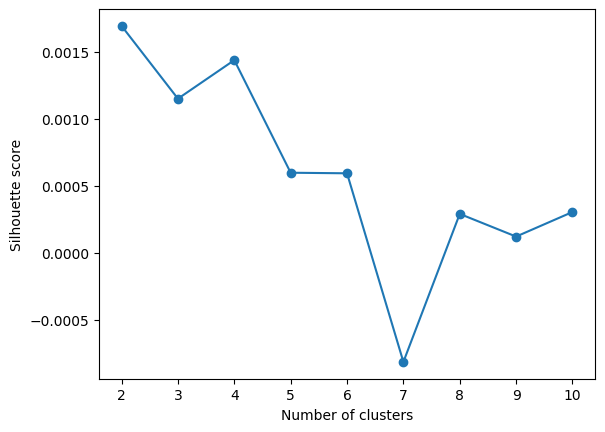

In [26]:
# Calculating silhouette score for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=45, init='k-means++')
    kmeans.fit(X_train_tfidf)
    y_pred = kmeans.predict(X_train_tfidf)
    score = silhouette_score(X_train_tfidf, y_pred)
    silhouette_scores.append(score)

# Ploting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

- Begins to decline after 4 So it would be better to use it for k

In [27]:
# # Define a k-means pipeline
# pipeline = Pipeline([
#     ('kmeans', KMeans(n_clusters=4, random_state=45))
# ])

# # Fitting the pipeline on the training data tfidf
# pipeline.fit(X_train_tfidf)

# # Get the labels assigned to each data point
# labels = pipeline.named_steps['kmeans'].labels_

# # Get the centroids
# centroids = pipeline.named_steps['kmeans'].cluster_centers_

# # Find the indices of data points corresponding to each centroid
# centroid_indices = [np.where(labels == i)[0] for i in range(len(centroids))]

# # Modify centroid labels and map to a consistent label set
# modified_labels = np.copy(labels)
# for i in range(len(centroid_indices)):
#     for j in range(len(centroid_indices[i])):
#         centroid_index = centroid_indices[i][j]
#         modified_labels[centroid_index] = sentiment.iloc[j]

# unique_labels = np.unique(modified_labels)
# consistent_labels = np.arange(len(unique_labels))
# label_mapping = dict(zip(unique_labels, consistent_labels))
# modified_labels = np.vectorize(label_mapping.get)(modified_labels)

# # Update the labels for y_train
# y_train = modified_labels[pipeline.named_steps['kmeans'].labels_ == labels]

# # Update the labels for y_test
# y_test = pipeline.predict(X_test)
# y_test = np.vectorize(label_mapping.get)(y_test)

# # Update the labels for y_final
# y_final = pipeline.predict(X_final_tfidf)
# y_final = np.vectorize(label_mapping.get)(y_final)

- Initially used concept of centroid to assign lables to the cluster. But this resulted in 40% data with no labels
- Hence used below to get labels for the data

In [28]:
# Defining a kmeans pipeline
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=4, random_state=45))
])
# Fiting the pipeline on the training data tfidf
pipeline.fit(X_train_tfidf)

# Predicting the clusters for the training data
y_train=pipeline.predict(X_train_tfidf)
# Predicting the clusters for the training data
y_test=pipeline.predict(X_test)
# Predicting the clusters for the prod data
y_final=pipeline.predict(X_final_tfidf)

In [29]:
y_train.shape,set(y_train),X_train_tfidf.shape

((32000,), {0, 1, 2, 3}, (32000, 84661))

In [30]:
y_test.shape,set(y_test)

((8000,), {0, 1, 2, 3})

In [31]:
y_final.shape,set(y_final)

((10000,), {0, 1, 2, 3})

## Logistic Regression

In [32]:
# Defining hyperparameters to tune
hyperparameters = {
    'C': uniform(0, 10), # regularization strength
    'penalty': ['l1', 'l2','elasticnet'], # regularization type
    'solver': ['newton-cg', 'saga']
}

log_model = LogisticRegression()

random_search = RandomizedSearchCV(log_model, hyperparameters, 
                                   scoring='accuracy', n_iter=10, random_state=45)




- RandomizedSearchCV performs a randomized search over the hyperparameter space
using cross-validation to find the best combination of hyperparameters.
The hyperparameters dictionary specifies the range of values to be searched for each hyperparameter.
- 'C': uniform(0, 10) means that the regularization strength C will be sampled uniformly between 0 and 10.
- 'penalty': ['l1', 'l2', 'elasticnet'] specifies the types of regularization to be considered.
- 'solver': ['newton-cg', 'saga'] specifies the solver algorithms to be considered.
- The 'scoring' parameter is set to 'accuracy', which indicates that we want to optimize for accuracy.
- 'n_iter=10' specifies the number of random combinations of hyperparameters to try.
- 'random_state=45' is set to ensure reproducibility of results.
- Then the RandomizedSearchCV object performs the search for the best hyperparameters.

In [33]:
random_search.fit(X_train_tfidf, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters:  {'C': 2.8968734025209484, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score:  0.9739374999999999


In [34]:
# Evaluating the best model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.975875


In [35]:
# Getting the predicted labels for the test data
y_test_pred = random_search.predict(X_test)

# Calculating precision
precision = precision_score(y_test, y_test_pred, average='micro')

# Calculating recall
recall = recall_score(y_test, y_test_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_test, y_test_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.98
Recall: 0.98
F1-score: 0.98


In [36]:
# Evaluating the best model on the prod data
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)


Final accuracy: 0.9769


In [37]:
# Geting the predicted labels for the test data
y_final_pred = random_search.predict(X_final_tfidf)

# Calculating precision
precision = precision_score(y_final, y_final_pred, average='micro')

# Calculating recall
recall = recall_score(y_final, y_final_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_final, y_final_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.98
Recall: 0.98
F1-score: 0.98


### Dimension Reduction

- Using TruncatedSVD(Truncated Singular Value Decomposition) 
- It is a class from scikit-learn as an alternative to perform dimensionality reduction on sparse data.
- As PCA does not support Sparse data 
- we perform Truncated SVD  or any SVD on the data matrix, whereas we use PCA on the covariance matrix.

In [38]:
hyperparameters = {
    'svd__n_components': [50, 100, 150],  # Number of components for TruncatedSVD
    'logistic__C': uniform(0, 10),  # Regularization strength for logistic regression
    'logistic__penalty': ['l1', 'l2'],  # Regularization type for logistic regression
    'logistic__solver': ['newton-cg', 'saga']  # Solver for logistic regression
}

pipeline = Pipeline([
    ('svd', TruncatedSVD()),
    ('logistic', LogisticRegression())
])

random_search = RandomizedSearchCV(pipeline, hyperparameters, scoring='accuracy', n_iter=10, random_state=45)
random_search.fit(X_train_tfidf, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('svd', TruncatedSVD()),
                                             ('logistic',
                                              LogisticRegression())]),
                   param_distributions={'logistic__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1baebc28c0>,
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['newton-cg',
                                                             'saga'],
                                        'svd__n_components': [50, 100, 150]},
                   random_state=45, scoring='accuracy')

- Reference: https://analyticsindiamag.com/beginners-guide-to-truncated-svd-for-dimensionality-reduction/

In [39]:
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


Best hyperparameters: {'logistic__C': 9.890115134756002, 'logistic__penalty': 'l2', 'logistic__solver': 'newton-cg', 'svd__n_components': 50}
Best cross-validation score: 0.9809999999999999


In [40]:
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.98525


In [41]:
# Getting the predicted labels for the test data
y_test_pred = random_search.predict(X_test)

# Calculating precision
precision = precision_score(y_test, y_test_pred, average='micro')

# Calculating recall
recall = recall_score(y_test, y_test_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_test, y_test_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.99
Recall: 0.99
F1-score: 0.99


In [42]:
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)


Final accuracy: 0.9833


In [43]:
# Geting the predicted labels for the test data
y_final_pred = random_search.predict(X_final_tfidf)

# Calculating precision
precision = precision_score(y_final, y_final_pred, average='micro')

# Calculating recall
recall = recall_score(y_final, y_final_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_final, y_final_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.98
Recall: 0.98
F1-score: 0.98


- After using Dimensinality reduction along with LogisticRegression performance of the model was good.

## Decision Tree Classifier

In [44]:
dt_model = DecisionTreeClassifier()
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}
random_search = RandomizedSearchCV(dt_model, hyperparameters, 
                                   scoring='accuracy', n_iter=10, random_state=45)

- RandomizedSearchCV performs a randomized search over the hyperparameter space
using cross-validation to find the best combination of hyperparameters.
The hyperparameters dictionary specifies the range of values to be searched for each hyperparameter.
- 'criterion': ['gini', 'entropy'] specifies the criteria for quality measurement of splits.
- 'splitter': ['best', 'random'] specifies the strategies used to choose the split at each node.
- 'max_depth': [5, 10, 20, 50, 100] specifies the maximum depth of the decision tree to be considered.
- 'min_samples_split': [2, 5, 10, 20] specifies the minimum number of samples required to split an internal node.
- 'min_samples_leaf': [1, 2, 4, 8] specifies the minimum number of samples required to be at a leaf node.
- The 'scoring' parameter is set to 'accuracy', which indicates that we want to optimize for accuracy.
- 'n_iter=10' specifies the number of random combinations of hyperparameters to try.
- 'random_state=45' is set to ensure reproducibility of results.
The RandomizedSearchCV object performs the search for the best hyperparameters.

In [45]:
random_search.fit(X_train_tfidf, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters:  {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 20, 'criterion': 'entropy'}
Best cross-validation score:  0.8879374999999999


In [46]:
# Evaluating the best model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.88675


In [47]:

# Evaluating the best model on the prod data
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.8943


In [48]:
# Getting the predicted labels for the test data
y_test_pred = random_search.predict(X_test)

# Calculating precision
precision = precision_score(y_test, y_test_pred, average='micro')

# Calculating recall
recall = recall_score(y_test, y_test_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_test, y_test_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.89
Recall: 0.89
F1-score: 0.89


In [49]:
# Geting the predicted labels for the test data
y_final_pred = random_search.predict(X_final_tfidf)

# Calculating precision
precision = precision_score(y_final, y_final_pred, average='micro')

# Calculating recall
recall = recall_score(y_final, y_final_pred, average='micro')

# Calculating F1-score
f1 = f1_score(y_final, y_final_pred, average='micro')

print("Precision: {:.2f}".format(precision, 2))
print("Recall: {:.2f}".format(recall, 2))
print("F1-score: {:.2f}".format(f1, 2))


Precision: 0.89
Recall: 0.89
F1-score: 0.89


### Dimension Reduction

In [50]:
# Define hyperparameters to tune
hyperparameters = {
    'svd__n_components': [50, 100, 150],  # Number of components for TruncatedSVD
    'dt__criterion': ['gini', 'entropy'],  # Criterion for Decision Tree
    'dt__splitter': ['best', 'random'],  # Splitter for Decision Tree
    'dt__max_depth': [5, 10, 20, 50, 100],  # Maximum depth of Decision Tree
    'dt__min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split an internal node
    'dt__min_samples_leaf': [1, 2, 4, 8]  # Minimum samples required to be at a leaf node
}

# Create the pipeline
pipeline = Pipeline([
    ('svd', TruncatedSVD()),
    ('dt', DecisionTreeClassifier())
])

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, hyperparameters, scoring='accuracy', n_iter=10, random_state=45)

In [51]:
random_search.fit(X_train_tfidf, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters:  {'svd__n_components': 50, 'dt__splitter': 'best', 'dt__min_samples_split': 2, 'dt__min_samples_leaf': 1, 'dt__max_depth': 10, 'dt__criterion': 'gini'}
Best cross-validation score:  0.9408749999999999


In [52]:
# Evaluating the best model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.94225


In [53]:
# Evaluating the best model on the prod data
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.9373


- After Dimension Reduction Model performance improved

## Random Forest Clasifier

In [54]:
# Defining the model
rf_model = RandomForestClassifier()

# Defining hyperparameters to tune
hyperparameters = {
    'n_estimators': [15, 25, 50, 100], # number of trees
    'max_depth': [2, 5, 10, 20], # maximum depth of tree
    'min_samples_split': [2, 5, 8, 10], # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6], # minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf_model, hyperparameters, 
                                   scoring='accuracy', n_iter=10, random_state=45)


In [55]:
random_search.fit(X_train_tfidf, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters:  {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Best cross-validation score:  0.5600937500000001


In [56]:
# Evaluating the best model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.5555


In [57]:
# Evaluating the best model on the prod data
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.5404


## Naive Bayes

In [58]:
# Define the model
mb_model = MultinomialNB()

# Define hyperparameters to tune
hyperparameters = {
    'alpha': uniform(0, 1),  # additive smoothing parameter
    'fit_prior': [True, False]  # whether to learn class prior probabilities or not
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(mb_model, hyperparameters, 
                                   scoring='accuracy', n_iter=10, random_state=45)



In [59]:
random_search.fit(X_train_tfidf, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters:  {'alpha': 0.04852200090644587, 'fit_prior': True}
Best cross-validation score:  0.6376562499999999


In [60]:
# Evaluating the best model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.64825


In [61]:
# Evaluating the best model on the prod data
final_accuracy = random_search.score(X_final_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.6383


## Conclusion
- We read the data.
- Performed the necessary cleaning such as Removing html tags, whitespaces, Text lemmatizing.
- Performed TF-IDF Vectorization.
- Using K-Means we used Silhouette curve to got the ideal number of clusters.
- Using those clusters we got the labels for the data.
- Used Various Models, hyperparameter tuning, Cross Validation to predict the data and evaluated the models.
- Best was Logistic Regression when used with TruncatedSVD.